In [1]:
import requests
import pandas as pd

In [2]:
# Método que retorna o tipo com base na url do Pokémon
def extrair_tipo(url):
    resposta = requests.get(url)
    conteudo = resposta.json()
    tipo = conteudo['types'][0]
    return (tipo['type']['name'])

In [68]:
url = 'https://pokeapi.co/api/v2/pokemon?limit=20'
resposta = requests.get(url)
conteudo = resposta.json()
lista = conteudo['results']

# Iterador que cria e preenche uma lista de dicionários com os dados de cada Pokémon 
pokemons = []
for n, pokemon in enumerate(lista):
    nome = lista[n]['name']
    url = lista[n]['url']
    tipo = extrair_tipo(url)
    dicio = {'nome': nome, 'tipo': tipo}
    pokemons.append(dicio)

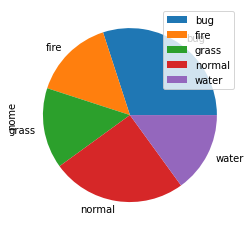

In [67]:
data = pd.DataFrame(pokemons)
ocorrencias = data.groupby(['tipo']).size()

dataframepokemons = pd.DataFrame(ocorrencias)
dataframepokemons.columns = ['nome']
dataframepokemons.plot.pie(y='nome')
